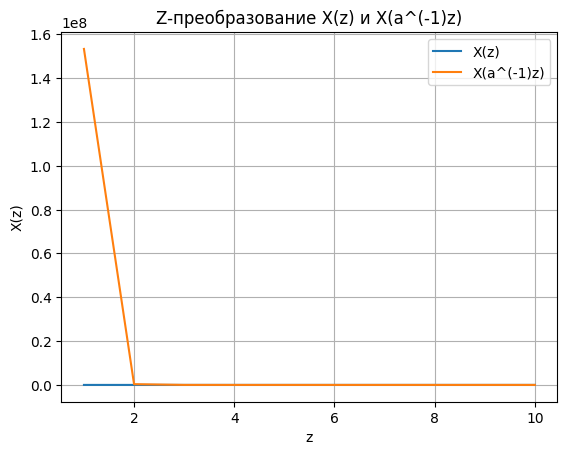

In [7]:
import sympy
import matplotlib.pyplot as plt

def z_transform(x, z):
    X = sum(x[n] * z**(-n) for n in range(len(x)))
    return X

n_values = 10
x = [2**n for n in range(n_values)] 

z_values = [n for n in range(1, n_values + 1)] 
X_z_values = [z_transform(x, z) for z in z_values] 

a = 2  # Значение a
X_az_values = [z_transform([a**n * x[n] for n in range(n_values)], 1 / a * z) for z in z_values] 

plt.plot(z_values, X_z_values, label='X(z)')
plt.plot(z_values, X_az_values, label='X(a^(-1)z)')
plt.xlabel('z')
plt.ylabel('X(z)')
plt.title('Z-преобразование X(z) и X(a^(-1)z)')
plt.legend()
plt.grid()
plt.show()


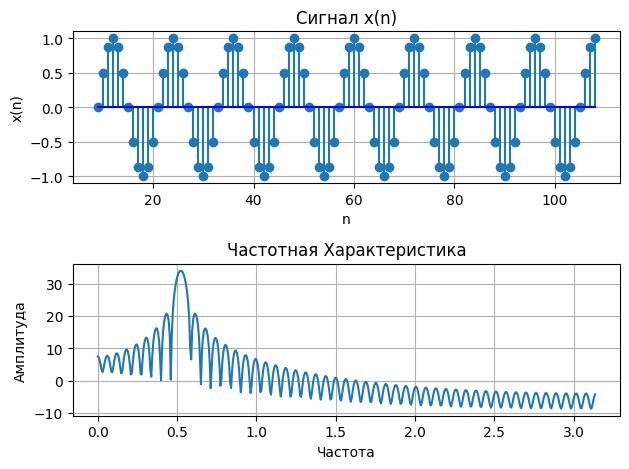

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
def x(n):
    # return n * (n >= 0)
    return np.cos(n * (np.pi / 6))
n = np.arange(9, 109, 1)
xn = x(n)
w, h = signal.freqz(xn)
arg_H = np.angle(h)
plt.Figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.stem(n, xn, basefmt="b-")
plt.title("Сигнал x(n)")
plt.xlabel("n")
plt.ylabel("x(n)")
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(w, 20 * np.log10(abs(h)))
plt.title("Частотная Характеристика")
plt.xlabel("Частота")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.tight_layout()
plt.show()

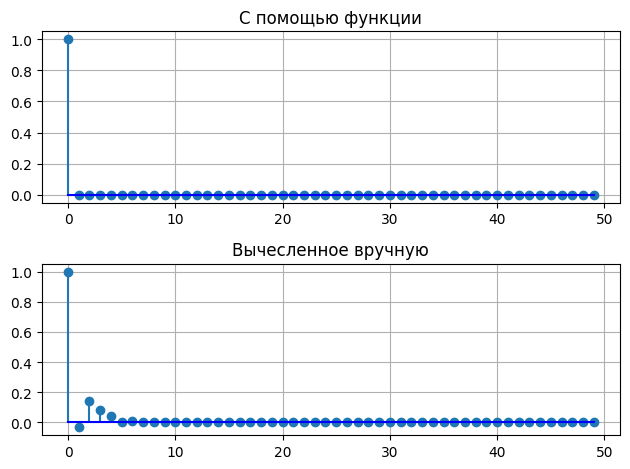

In [9]:
a = [8, -2, -1]
b=[1]

n1 = np.arange(0, 50)
h1 = signal.lfilter(b, a, np.zeros(len(n1)))
h1[0] = 1
s = len(h1)
n2 = np.arange(0, s)
h2 = 3/5 % (1/2) ** n2 + 2/5 * (-1/3) ** n2
plt.subplot(2, 1, 1)
plt.stem(n1, h1, basefmt="b-")
plt.grid(True)

plt.title("С помощью функции")
plt.subplot(2, 1, 2)
plt.stem(n2, h2, basefmt="b-")
plt.grid(True)
plt.title("Вычесленное вручную")
plt.tight_layout()

plt.show()


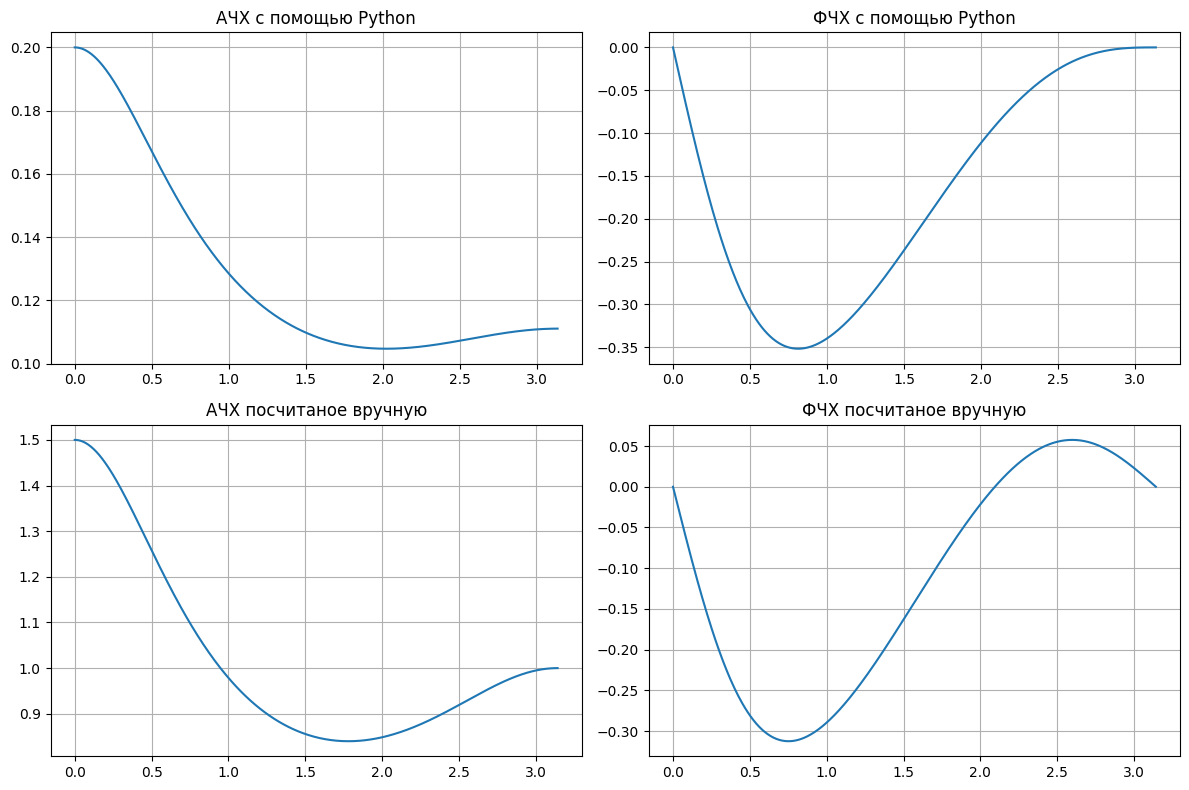

In [10]:
# var 18

b = [1]

a = [8, -2, -1]

w, H = signal.freqz(b, a)

A1 = np.abs(H)

Ph1 = np.angle(H)

n = len(w)

w_manual = np.linspace(0, np.pi, n)
x =1 - 1/6 * np.cos(w_manual) + 1/6 * np.sin(w_manual)**2 - 1/6 * np.cos(w_manual)**2
y = 1/6 * np.sin(w_manual) + 1/6 * np.sin(2 * w_manual)
A2 = 1/ np.sqrt(x**2 + y**2)

Ph2 = np.arctan(y / (-x))
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(w, A1)
plt.grid(True)
plt.title("АЧХ с помощью Python")

plt.subplot(2, 2, 2)
plt.plot(w, Ph1)
plt.grid(True)
plt.title("ФЧХ с помощью Python")

plt.subplot(2, 2, 3)
plt.plot(w_manual, A2)
plt.grid(True)
plt.title("АЧХ посчитаное вручную")

plt.subplot(2, 2, 4)
plt.plot(w_manual, Ph2)
plt.grid(True)
plt.title("ФЧХ посчитаное вручную")

plt.tight_layout()

plt.show()

Система устойчива.


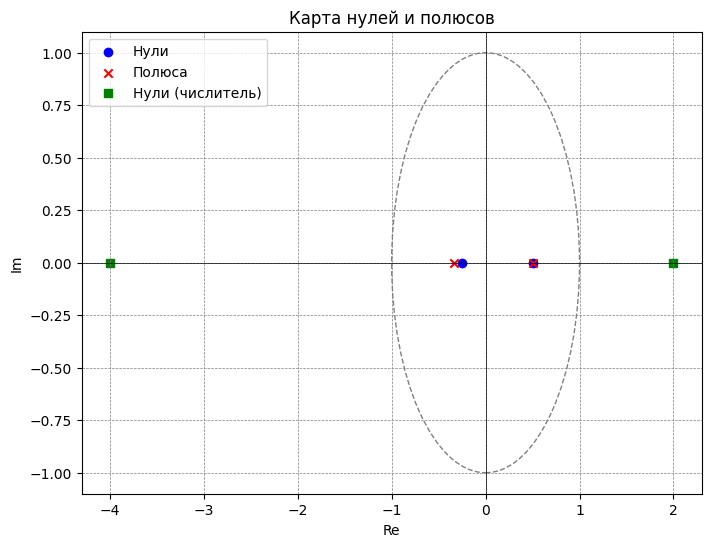

In [15]:
def find_zeros(b):
    b0, b1, b2 = b

    discriminant = b1**2 - 4*b0*b2


    if discriminant >= 0:
        z1 = (-b1 + np.sqrt(discriminant)) / (2 * b2)
        z2 = (-b1 - np.sqrt(discriminant)) / (2 * b2)
        return [z1, z2]
    else:

        real_part = -b1 / (2 * b2)
        imag_part = np.sqrt(abs(discriminant)) / (2 * b2)
        z1 = complex(real_part, imag_part)
        z2 = complex(real_part, -imag_part)
        return [z1, z2]

def plot_zeros_poles(b, a):

    z, p, k = signal.tf2zpk(b, a)


    plt.figure(figsize=(8, 6))
    plt.scatter(np.real(z), np.imag(z), marker='o', color='blue', label='Нули')
    plt.scatter(np.real(p), np.imag(p), marker='x', color='red', label='Полюса')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)
    plt.title('Карта нулей и полюсов')

   
    radius = 1 
    circle = plt.Circle((0, 0), radius, color='gray', fill=False, linestyle='dashed')
    plt.gca().add_patch(circle)


    numerator_zeros = find_zeros(b)
    plt.scatter(np.real(numerator_zeros), np.imag(numerator_zeros), marker='s', color='green', label='Нули (числитель)')

    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.legend()

    if all(np.abs(p) < 1):
        print("Система устойчива.")
    else:
        print("Система неустойчива.")

    plt.show()

    return z, p, k

b = [1, 0, 0]
b = [8, -2, -1]
z, p, k = plot_zeros_poles(b, a)


[   0.    1.    0.    2.    0.    3.    0.    4.    0.    5.  -10.   15.
  -20.   25.  -30.   35.  -40.   45.  -50.   55.  -60.   65.  -70.   75.
  -80.   85.  -90.   95. -100.  105. -110.  115. -120.  125. -130.  135.
 -140.  145. -150.  155. -160.  165. -170.  175. -180.  185. -190.  195.
 -200.  205. -210.  215. -220.  225. -230.  235. -240.  245. -250.  255.
 -260.  265. -270.  275. -280.  285. -290.  295. -300.  305. -310.  315.
 -320.  325. -330.  335. -340.  345. -350.  355. -360.  365. -370.  375.
 -380.  385. -390.  395. -400.  405. -410.  415. -420.  425. -430.  435.
 -440.  445. -450.  455.]


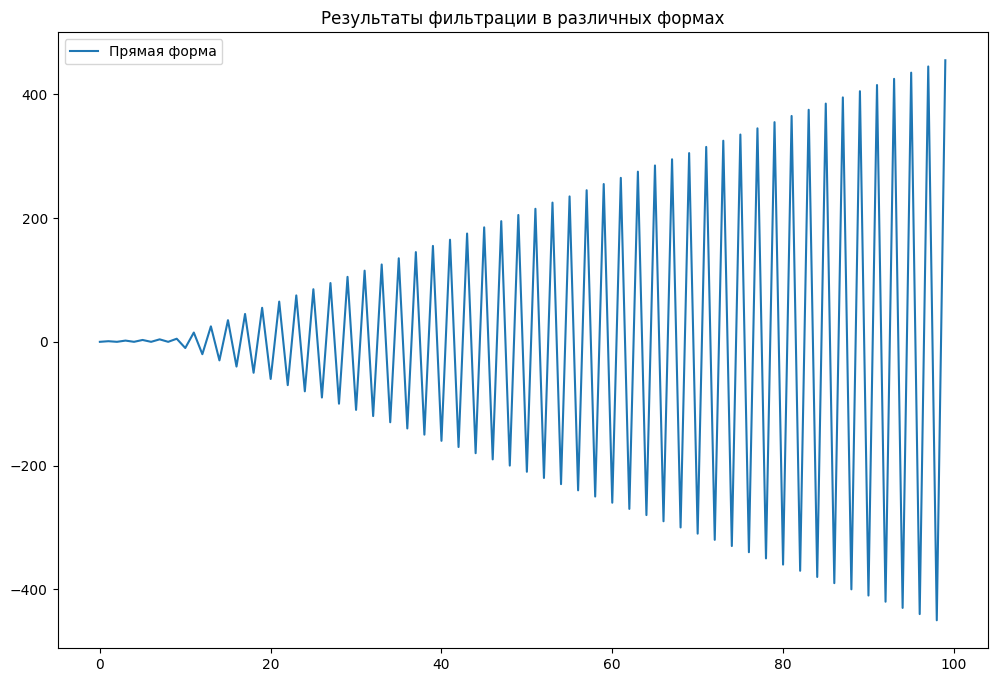

In [12]:
def direct_form_I(x, b, a):
    N = 100
    y = np.zeros(N)
    
    for n in range(N):
        if n < 10:
            y[n] = n + b[1] * y[n-1] + b[2] * y[n-2]
        else:
            y[n] = b[1] * y[n-1] + b[2] * y[n-2]
                
        
    return y



b = [8, -2, -1]
a = [1]

x = n

y_direct_form_I = direct_form_I(x, b, a)

print(y_direct_form_I)

plt.figure(figsize=(12, 8))

plt.plot(y_direct_form_I, label='Прямая форма')

plt.legend()
plt.title('Результаты фильтрации в различных формах')
plt.show()